In [1]:
from MultivariateNormalDistribution import mvn
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture
import numpy as np
from sklearn import datasets
from sklearn import utils
import math
from matplotlib.patches import Ellipse
import numpy.random as rnd

%matplotlib inline

In [2]:
#http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html
color_iter = itertools.cycle(['r', 'g', 'b', 'y',
                              'black'])

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 2, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-9., 5.)
    #plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

===================== reference ================================
reference mu: 
[[5.006]
 [3.418]
 [1.464]
 [0.244]]
===================== prior 1 ================================
mu prior: 
[[4.9 ]
 [3.16]
 [1.44]
 [0.18]]
===================== mvn 1 ================================
lik1: -59.14729300129402
lik1: -63.62290197905629
lik1: -69.52292715410215
lik1: -75.79939738510186
lik1: -82.22596587120007
lik1: -88.72976590932322
lik1: -95.28141173284885
lik1: -101.86701112089763
lik1: -108.47909933255899
lik1: -115.11319797415726
lik1: -121.76635042695708
lik1: -128.4364406927843
lik1: -135.1218526542084
lik1: -141.82128853396475
lik1: -148.5336664963965
lik1: -155.25805972030466
lik1: -161.9936582494731
lik1: -168.7397439071284
lik1: -175.49567301719668
lik1: -182.2608639787295
lik1: -189.0347879768654
lik1: -195.81696179774906
lik1: -202.60694210752393
lik1: -209.40432078600762
lik1: -216.2087210436177
lik1: -223.01979413859743
lik1: -229.8372165644269
lik1: -236.6606876154499
lik1

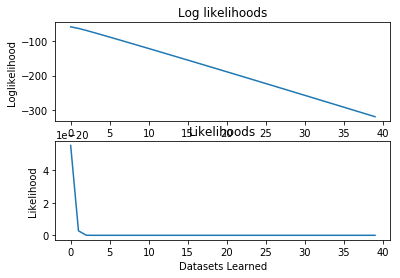

In [3]:
dimensions = 4
prior_data_size = 5
training_data_size = 45

iris = datasets.load_iris()
X = iris.data # Features
y = iris.target # Targets
# Only take part of the dimensions
X = X[:,range(0,dimensions)]
# Shuffle dataset
X, y = utils.shuffle(X,y)



# Generate training and test data for first type of iris
X_type_1 = X[y==0]
y_type_1 = y[y==0]
X_type_1_prior = np.transpose(X_type_1[range(0,prior_data_size)])
X_type_1_train = np.transpose(X_type_1[range(prior_data_size,training_data_size),:])
X_type_1_test = np.transpose(X_type_1[range(training_data_size,50),:])


X_type_2 = X[y==1]
y_type_2 = y[y==1]
X_type_2_prior = np.transpose(X_type_2[range(0,prior_data_size)])
X_type_2_train = np.transpose(X_type_2[range(prior_data_size,training_data_size),:])
X_type_2_test = np.transpose(X_type_2[range(training_data_size,50),:])

X_type_3 = X[y==2]
y_type_3 = y[y==2]
X_type_3_prior = np.transpose(X_type_3[range(0,prior_data_size)])
X_type_3_train = np.transpose(X_type_3[range(prior_data_size,training_data_size),:])
X_type_3_test = np.transpose(X_type_3[range(training_data_size,50),:])

# Generate randomized training data
#X_train = np.concatenate((X_type_1_train, X_type_2_train, X_type_3_train),axis=0)
# Generate randomized test data
print("===================== reference ================================")
mvn_ref = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="reference")
mvn_ref.MLE(np.transpose(X_type_1))
print("reference mu: \n{}".format(mvn_ref.mu))


print("===================== prior 1 ================================")
mvn_prior = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="prior")
mvn_prior.MLE(X_type_1_prior)
print("mu prior: \n{}".format(mvn_prior.mu))

nu0 = prior_data_size # Weight of S_0
S_0 = np.multiply(np.diag(np.diag(mvn_prior.sigma)),nu0) # Prior mean for Sigma
m_0 = mvn_prior.mu # Prior mean for mu
kappa0 = prior_data_size # Weight of m_0
print("===================== mvn 1 ================================")
mvn_1 = mvn.MultivariateNormalDistribution(dimensions=dimensions, m0=m_0, S0=S_0,kappa=kappa0, nu=nu0, name="MVN1")
# Incremental Learning
logliks = []
liks = []
for i in range(0,training_data_size-prior_data_size):
    cur_training_data = np.transpose(X_type_1_train)[0]
    #print("training_data: \n{}".format(cur_training_data.reshape(4,1)))
    mvn_1.MAP(cur_training_data.reshape(4,1))
    #print(mvn_1.mu)
    lik1 = mvn_1.likelihood(X_type_1_test)
    loglik1 = mvn_1.loglikelihood(X_type_1_test)
    print("lik1: {}".format(loglik1))
    logliks.append(loglik1)
    liks.append(lik1)
    

fig = plt.figure()
plt.subplot(211)
plt.title("Log likelihoods")
plt.xlabel("Datasets Learned")
plt.ylabel("Loglikelihood")
plt.plot(range(0,len(logliks)),logliks)
plt.subplot(212)
plt.title("Likelihoods")
plt.xlabel("Datasets Learned")
plt.ylabel("Likelihood")
plt.plot(range(0,len(liks)),liks)

#learn 
#f1 score
    

In [79]:
dimensions = 4
prior_data_size = 5
training_data_size = 40

iris = datasets.load_iris()
X = iris.data # Features
y = iris.target # Targets
# Only take part of the dimensions
X = X[:,range(0,dimensions)]
print(y)

# Generate training and test data for first type of iris
X_type_1 = X[y==0]
y_type_1 = y[y==0]
X_type_1_prior = np.transpose(X_type_1[range(0,prior_data_size)])
X_type_1_train = np.transpose(X_type_1[range(prior_data_size,training_data_size),:])
X_type_1_test = np.transpose(X_type_1[range(training_data_size,50),:])
# Generate training and test data for first type of iris
X_type_2 = X[y==1]
y_type_2 = y[y==1]
X_type_2_prior = np.transpose(X_type_2[range(0,prior_data_size)])
X_type_2_train = np.transpose(X_type_2[range(prior_data_size,training_data_size),:])
X_type_2_test = np.transpose(X_type_2[range(training_data_size,50),:])
# Generate training and test data for first type of iris
X_type_3 = X[y==2]
y_type_3 = y[y==2]
X_type_3_prior = np.transpose(X_type_3[range(0,prior_data_size)])
X_type_3_train = np.transpose(X_type_3[range(prior_data_size,training_data_size),:])
X_type_3_test = np.transpose(X_type_3[range(training_data_size,50),:])
print("===================== prior 1 ================================")
mvn_prior_1 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="prior1")
mvn_prior_1.MLE(X_type_1_prior)
print("mu prior 1: \n{}".format(mvn_prior_1.mu))
print("===================== prior 2 ================================")
mvn_prior_2 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="prior2")
mvn_prior_2.MLE(X_type_2_prior)
print("mu prior 2: \n{}".format(mvn_prior_2.mu))
print("===================== prior 3 ================================")
mvn_prior_3 = mvn.MultivariateNormalDistribution(dimensions=dimensions, name="prior3")
mvn_prior_3.MLE(X_type_3_prior)
print("mu prior 3: \n{}".format(mvn_prior_3.mu))


X_train = np.concatenate((np.transpose(X_type_1_train),np.transpose(X_type_2_train),np.transpose(X_type_3_train)),axis=0)
X_test = np.concatenate((np.transpose(X_type_1_test),np.transpose(X_type_2_test),np.transpose(X_type_3_test)),axis=0)
y_train = np.concatenate((y_type_1[range(prior_data_size,training_data_size)],y_type_2[range(prior_data_size,training_data_size)],y_type_3[range(prior_data_size,training_data_size)]),axis=0)
print(X_train)

X_train, y_train = utils.shuffle(X_train,y_train)

# Learn, decide which mvn to update, todo create mvns, calculate f1 score by using the test set to see which y_tests are correct and which are not
for i in range(0,len(X_train)):
    if y_train[i] == 0:
        #print("i: {}, y_test: 0, X_train[{}]: {}".format(i,i,X_train[i]))
    elif y_train[i] == 1:
        #print("i: {}, y_test: 1, X_train[{}]: {}".format(i,i,X_train[i]))
    elif y_train[i] == 2:
        #print("i: {}, y_test: 2, X_train[{}]: {}".format(i,i,X_train[i]))

IndentationError: expected an indented block (<ipython-input-79-991d7754eda3>, line 55)